# Simple Linear Regression

In simple words Simple Linear regression is this formula:
$$ Y = b_0 + b_1  X  $$
* $b_0$ - Constant term/ Y-intercept/ Constant Bais term.
* $b_1$ - Slope of line/ Coefficient of X/ Associated Weight of X, and determines how a unit change in X afects Y.
* $Y$ - Dependent variable/ target Variable? Label
* $X$ - Independent variable/ Feature**

The image below explains this formula.

<img src="Simple Linear Regression Demo.png">

Here, 

$b_0$ = 30K, that's the salary a fresher(i.e. 0 yrs experience) will get.

$b_1$ = 10K, for 1 year of experience the person will get extra 10k in salary.


### How we find the best fitting line.
1. The Linear Regression Algorithm draws all the possible lines on our data.
2. Then it finds $Sum~ of~ Squares=\sum{Y-\hat Y}$ and records in a temporary storage.
* $Y$ - Actual data point
* $\hat Y$ - Projection of $Y$ on the line.
3. Then it finds the line which has the least sum of squares. and that's our best fit line.

Let's start with Data Preprocessing.

_I'm using this Data Preprocessing template from my Data Preprocessing folder._

# 1. Importing the required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importing the data

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head() 

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


This data is a company's Salary data. 

we will try to find the relation between the Years of experience and Salary.

# 3. Separating Features and Targets/ Labels

In [14]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# 4. Handling Missing values

In [15]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# 😍
Congrats No null values !! 

# 5. Splitting the data into train and test data

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 6. As the feature values are already in range there is no need for feature scaling.

## Model Building - Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

## Training the model

In [23]:
# the Linear regression model need the X_train and y_train to be in 2D
# Hence performing these lines.
X_train2 = X_train.reshape(-1, 1)   
y_train2 = y_train.reshape(-1, 1)

regressor.fit(X_train2, y_train2)

LinearRegression()

## Predicting the test set results

In [36]:
X_test2 = X_test.reshape(-1, 1)
y_pred = regressor.predict(X_test2)

In [37]:
y_pred

array([[ 40748.96184072],
       [122699.62295594],
       [ 64961.65717022],
       [ 63099.14214487],
       [115249.56285456],
       [107799.50275317]])

## Visualizing the Training set results

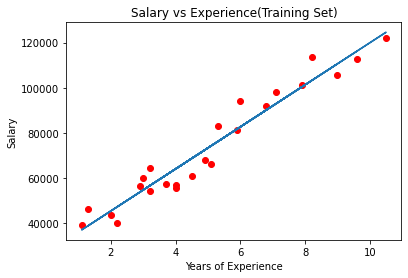

In [54]:
# Visualizing for the Training data
plt.scatter(X_train2, y_train2, color='red')
plt.plot(X_train2, regressor.predict(X_train2))
plt.title("Salary vs Experience(Training Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

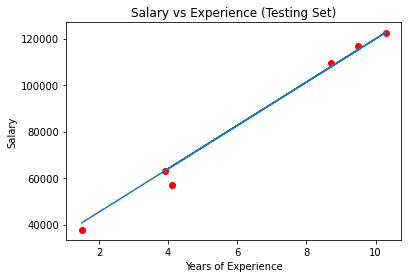

In [55]:
plt.scatter(X_test2, y_test2, color='red')
plt.plot(X_test2, regressor.predict(X_test2))
plt.title("Salary vs Experience (Testing Set)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()

# Multiple Linear Regression

We will be using the data of 50 startups and we need to create a model to show case the the relationship between each feature and the Profit column.

Since in this data we have a categorical feature let's discuss about the Dummy variable trap.

# Multi Colinearity
## Dummy Variable Trap:
Dummy variable mean Duplicate Variables.

For Example:
$D_1 ~and ~D_2~ are~ two ~ Dummy ~ variables. Then~D_2 = 1-D_1$
$$ Y = b_0 + b_1 X_1 + b_2 X_2 + \cdots + b_4 D_1 + b_5 D_2 $$

The phenomena where one (or more) independent variable predicts another independent variable is called Multi Colinearity.

As a result the model cannot differentiate between the effects of D_1 from the effects of D_2.

And hence the model performs inefficiently.

# Building A Model 
### 5 Methods:
1. All in
2. Backward Elimination
3. Forward Selection
4. Bi-directional Elimination
5. Score Comparison


### 1. All in:
Use it when you must use all the Features.

### 2. Backward Elimination - Fastest
1. Select a significance level to stay in the model. Ex. $SL_{Enter} = 0.05$
2. Fit the full model with all possible predictors/ features.
3. Consider the predictor with the highest P-Value. If P > SL then go to step 4, else FIN.
4. Remove the predictor.
5. Fit model without this variable.
6. Go To Step 3.

    **FIN. Model is Ready**


### 3. Forward Selection
1. Select the significance level to enter the model. E.x. $SL_{Stay} = 0.05$
2. Fit all possible simple regression model and select the one with lowest P-value.
3. Keep this variable and fit all possible models with one extra predictor added to the one(s) you already have.
4. Consider the predictor with the lowest P-value. If P-value < SL Go to Step 3, else FIN.
5. Keep the previous model.



### 4. Bi-directional Elimination
**It's a combination of Backward Elimination and Forward Selection.**
1. Select a significance level to Enter and to stay in the model. 

Ex. $SL_{Enter} = 0.05$, $SL_{Stay} = 0.05$ 

2. Perform the next step of Forward Selection (Next variable must have: $P < SL_{Enter}$ to enter)
3. Perform all steps of Backward Elimination (Old Variables must have: $P < SL_{Stay}$ to Stay)
4. No new variables can enter and no old variables can exit.

### 5. Score Comparison
1. Select a criterion of goodness of fit.
2. Construct all possible Regression Models: $2^N-1$ total combinations. **Resource Consuming approach.**
3. Select the one with the best criterion.


# Python Implementation

## Data Preprocessing

In [32]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Dataset
dataset = pd.read_csv("50_Startups.csv")
print("dataset:\n",dataset.head())

## Now we need to separate the Features and label bcz our ML Models expects the data to be this way.
x = dataset.iloc[:, :-1].values # iloc - Locate Indices
y = dataset.iloc[:, -1].values
print("\nx:\n", x[:10])
print("\ny:\n", y[:10])



dataset:
    R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

x:
 [[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']]

y:
 [192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96]


In [33]:
# Checking for missing values
print("\n Null Value Report: \n",dataset.isnull().sum())


 Null Value Report: 
 R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [34]:
# If there is categorical feature in the Dataset use this - OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop="first"),[3])], 
                       remainder="passthrough")
x = ct.fit_transform(x)

# our ML Model expects training data to be in np.array formt
x = np.array(x)
print("\n OneHotEncoded x: \n", x[:10])


 OneHotEncoded x: 
 [[0.0 1.0 165349.2 136897.8 471784.1]
 [0.0 0.0 162597.7 151377.59 443898.53]
 [1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 1.0 131876.9 99814.71 362861.36]
 [0.0 0.0 134615.46 147198.87 127716.82]
 [1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 1.0 120542.52 148718.95 311613.29]
 [0.0 0.0 123334.88 108679.17 304981.62]]


In [35]:
# Train Test Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print("\nx_train:\n", x_train[:10])
print("\nx_test:\n", x_test[:5])
print("\ny_train:\n", y_train[:10])
print("\ny_test:\n", y_test[:5])


x_train:
 [[0.0 0.0 63408.86 129219.61 46085.25]
 [0.0 0.0 38558.51 82982.09 174999.3]
 [0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 28663.76 127056.21 201126.82]
 [0.0 1.0 86419.7 153514.11 0.0]
 [0.0 0.0 23640.93 96189.63 148001.11]
 [0.0 0.0 0.0 116983.8 45173.06]
 [1.0 0.0 75328.87 144135.98 134050.07]
 [1.0 0.0 73994.56 122782.75 303319.26]
 [0.0 0.0 91992.39 135495.07 252664.93]]

x_test:
 [[0.0 1.0 72107.6 127864.55 353183.81]
 [0.0 1.0 46014.02 85047.44 205517.64]
 [0.0 0.0 28754.33 118546.05 172795.67]
 [0.0 1.0 20229.59 65947.93 185265.1]
 [1.0 0.0 153441.51 101145.55 407934.54]]

y_train:
 [ 97427.84  81005.76 111313.02  90708.19 122776.86  71498.49  14681.4
 105733.54 110352.25 134307.35]

y_test:
 [105008.31  96479.51  78239.91  81229.06 191050.39]


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 2:] = sc.fit_transform(x_train[:, 2:])
x_test[:, 2:] = sc.transform(x_test[:, 2:])
print("\nScaled x_train: \n",x_train[:10])
print("\nScaled x_test: \n",x_test[:5])


Scaled x_train: 
 [[0.0 0.0 -0.32133038496226557 0.1870026674423921 -1.3700842498314485]
 [0.0 0.0 -0.8955888632549125 -1.6137113933587284 -0.2844217262777205]
 [0.0 1.0 0.02485155221349298 1.143247918493481 0.7660716916733847]
 [1.0 0.0 -1.1242433521488788 0.10274934245573336 -0.0643862119377357]
 [0.0 1.0 0.21041946816397095 1.1331487356167402 -1.758195776958278]
 [0.0 0.0 -1.240314261110831 -1.0993455063779118 -0.511789674820048]
 [0.0 0.0 -1.786624654615268 -0.2895193240547935 -1.377766348852932]
 [1.0 0.0 -0.045874835892206894 0.7679187112767505 -0.6292797489632386]
 [1.0 0.0 -0.07670896217898597 -0.06367998831873652 0.7962376091160047]
 [0.0 0.0 0.3391969091012878 0.43139962169069546 0.36964711927627564]]

Scaled x_test: 
 [[0.0 1.0 -0.12031409362377804 0.13423003614146675 1.2161768879523382]
 [0.0 1.0 -0.723301960756734 -1.5332766125686772 -0.027408483585626763]
 [0.0 0.0 -1.1221504001228924 -0.22867770578706312 -0.3029798160032289]
 [0.0 1.0 -1.3191457832961864 -2.277104486801

# Training the Multiple linear regression model 

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Predicting the results

In [37]:
y_pred = lr.predict(x_test)
np.set_printoptions(precision=2)

In [38]:
y_test

array([105008.31,  96479.51,  78239.91,  81229.06, 191050.39, 182901.99,
        35673.41, 101004.64,  49490.75,  97483.56])

In [39]:
y_pred

array([114664.42,  90593.16,  75692.84,  70221.89, 179790.26, 171576.92,
        49753.59, 102276.66,  58649.38,  98272.03])

In [42]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), axis=1))

[[114664.42 105008.31]
 [ 90593.16  96479.51]
 [ 75692.84  78239.91]
 [ 70221.89  81229.06]
 [179790.26 191050.39]
 [171576.92 182901.99]
 [ 49753.59  35673.41]
 [102276.66 101004.64]
 [ 58649.38  49490.75]
 [ 98272.03  97483.56]]
